###Purpose: evaluate mean runtime to collect links per page.

Explore distribution of:

-number of links per article linked on chosen page  
-number of words per article linked on chosen page  
-runtime collecting links per article linked on chosen page  
-runtime per link  

In [176]:
from wiki_wars import pageObject
import sys
import time
import numpy as np
import statsmodels.api as sm
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
chosen_page = "Affenpinscher"

In [179]:
def links_and_words(keyword):
    
    '''
    - Return a set of links that appear on a given keyword's Wikipedia page
    - Return the number of words in a given keyword's Wikipedia page
    - Return runtime involved to return all links that appear on a given keyword's Wikipedia page
    
    '''

    page_object = pageObject(keyword)

    t = time.time()
    set_links = set(page_object.return_links()) #collect links
    runtime = time.time() - t
    
    list_words = page_object.return_filtered_words() #collect words
    
    return set_links,len(list_words),runtime #return to traverse through

In [180]:
t = time.time()

set_links,_,_ = links_and_words(chosen_page)

l = []
w = []
r = []

for meta_keyword in set_links:

    meta_set_links,num_words,runtime = links_and_words(meta_keyword)
    
    l.append(len(meta_set_links))
    w.append(num_words)
    r.append(runtime)
    
print "Runtime: {0:.2f} seconds".format(time.time()-t)

Runtime: 81.65 seconds


In [181]:
print "Size - runtime: {0}".format(len(r))
print "Size - links: {0}".format(len(w))
print "Size - words: {0}".format(len(l))

Size - runtime: 103
Size - links: 103
Size - words: 103


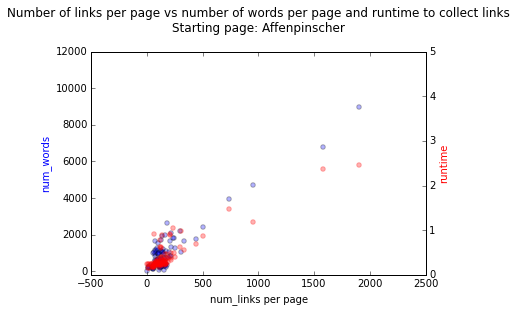

In [182]:
#plot number of links per page vs number of words
#plot number of links per page vs runtime to collect links

fig, ax1 = plt.subplots()
ax1.scatter(l, w, alpha=.3, label='num_words')
ax1.set_xlabel('num_links per page')
ax1.set_ylabel('num_words', color='b')

ax2 = ax1.twinx()
ax2.scatter(l, r, color = 'r', alpha=.3, label='runtime')
ax2.set_ylabel('runtime', color='r')

ax1.set_ylim(-200,12000)
ax2.set_ylim(0,5)

title = "Number of links per page vs number of words per page \
and runtime to collect links\nStarting page: {}\n".format(chosen_page)

plt.title(title)

In [183]:
#convert data into pandas dataframe
#create field 'runtime/link' to measure runtime per link

df = pd.DataFrame(np.column_stack((w,r,l)))
df.columns = ['num_words','num_runtime','num_links']
df['runtime/link'] = df.apply(lambda row: row['num_runtime']/row['num_links'], axis=1)
df.head()

,num_words,num_runtime,num_links,runtime/link
0,89,0.290098,154,0.001884
1,826,0.389303,218,0.001786
2,1101,0.399879,126,0.003174
3,339,0.331710,161,0.002060
4,838,0.246782,75,0.003290


In [184]:
#describe runtime
df['num_runtime'].describe()

count    103.000000
mean       0.405821
std        0.372822
min        0.150635
25%        0.238497
50%        0.266413
75%        0.387560
max        2.465975
Name: num_runtime, dtype: float64

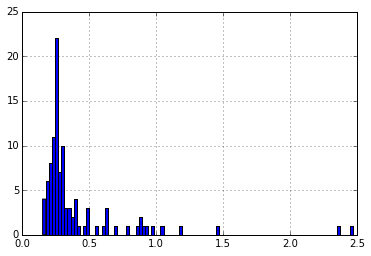

In [185]:
#distribution of runtime to collect links
df['num_runtime'].hist(bins=100)

In [186]:
#describe number of links
#mean number of links is 371.6
df['num_links'].describe()

count     103.000000
mean      177.097087
std       255.824906
min         4.000000
25%        83.000000
50%       126.000000
75%       168.000000
max      1899.000000
Name: num_links, dtype: float64

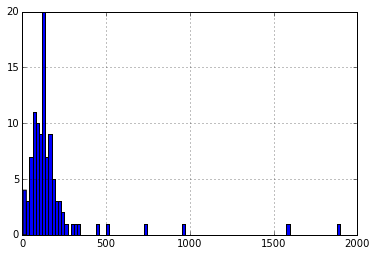

In [187]:
#distribution of number of links
df['num_links'].hist(bins=100)

In [188]:
#describe # of words
df['num_words'].describe()

count     103.000000
mean      983.456311
std      1242.866538
min        34.000000
25%       293.000000
50%       668.000000
75%      1100.500000
max      8956.000000
Name: num_words, dtype: float64

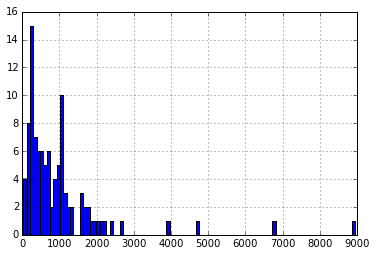

In [189]:
#distribution of number of words
df['num_words'].hist(bins=100)

In [190]:
#mean runtime per link is .0034s
df['runtime/link'].describe()

count    103.000000
mean       0.003901
std        0.006667
min        0.001245
25%        0.001879
50%        0.002509
75%        0.003387
max        0.061500
Name: runtime/link, dtype: float64

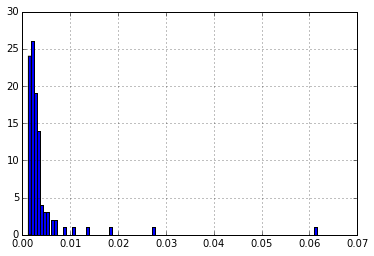

In [191]:
#distribution of runtime per link
df['runtime/link'].hist(bins=100)